<aside>
💡 Question-1:

Given a Binary Tree (Bt), convert it to a Doubly Linked List(DLL). The left and right pointers in nodes are to be used as previous and next pointers respectively in converted DLL. The order of nodes in DLL must be the same as in Inorder for the given Binary Tree. The first node of Inorder traversal (leftmost node in BT) must be the head node of the DLL.

Example:

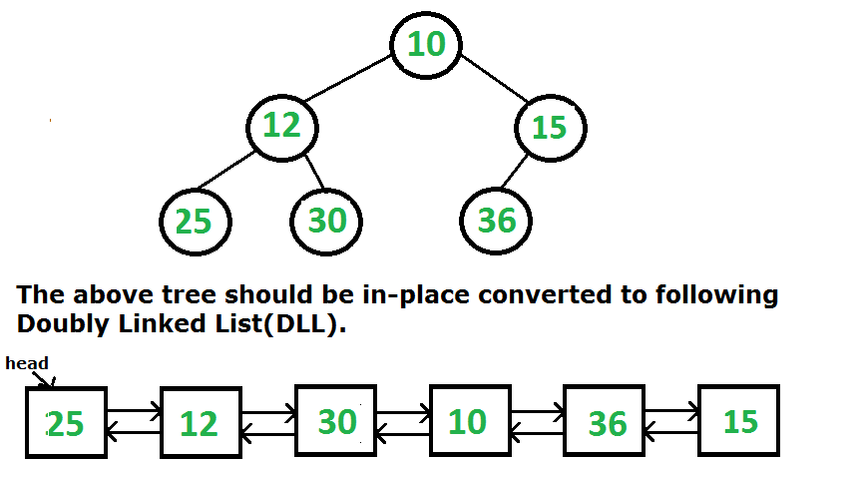
</aside>

To convert a binary tree to a doubly linked list (DLL) in the order of an inorder traversal, you can use a modified recursive approach. Here's the algorithm to solve this problem:

1 Define a TreeNode class with val, left, and right attributes, as well as prev and next attributes for the DLL.

2 Define a function binaryTreeToDLL(root) that takes the root node of the binary tree as input and returns the head node of the DLL.

3 In the binaryTreeToDLL function, if the root is None, return None.

4 Recursively convert the left subtree to a DLL by calling binaryTreeToDLL on the left child.

5 Find the rightmost node of the DLL (the node with the largest value) by traversing the DLL's next pointers starting from the head node.

6 If the rightmost node exists, set its next pointer to the root node and the root node's prev pointer to the rightmost node.

7 If the rightmost node does not exist, set the root node as the head node of the DLL.

8 Recursively convert the right subtree to a DLL by calling binaryTreeToDLL on the right child.

9 Return the head node of the DLL.

In [2]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None, prev=None, next=None):
        self.val = val
        self.left = left
        self.right = right
        self.prev = prev
        self.next = next

def binaryTreeToDLL(root):
    if root is None:
        return None

    headLeft = binaryTreeToDLL(root.left)

    rightmost = headLeft
    if rightmost:
        while rightmost.next:
            rightmost = rightmost.next

    if rightmost:
        rightmost.next = root
        root.prev = rightmost
    else:
        headLeft = root

    root.next = binaryTreeToDLL(root.right)
    if root.next:
        root.next.prev = root

    return headLeft

# Example usage:
# Create the binary tree from the example
root = TreeNode(10)
root.left = TreeNode(12)
root.right = TreeNode(15)
root.right.left = TreeNode(25)
root.right.right = TreeNode(30)

# Convert the binary tree to a DLL
head = binaryTreeToDLL(root)

# Print the DLL in both forward and backward directions
current = head
while current:
    print(current.val, end=" ")
    current = current.next

print()

while head.next:
    head = head.next

current = head
while current:
    print(current.val, end=" ")
    current = current.prev


12 10 25 15 30 
30 15 25 10 12 

<aside>
💡 Question-2

A Given a binary tree, the task is to flip the binary tree towards the right direction that is clockwise. See the below examples to see the transformation.

In the flip operation, the leftmost node becomes the root of the flipped tree and its parent becomes its right child and the right sibling becomes its left child and the same should be done for all left most nodes recursively.

</aside>

o flip a binary tree towards the right direction (clockwise), you can use a recursive approach. Here's the algorithm to solve this problem:

1 Define a TreeNode class with val, left, and right attributes.

2 Define a function flipBinaryTree(root) that takes the root node of the binary tree as input and returns the root node of the flipped binary tree.

3 If the root is None or a leaf node, return the root itself.

4 Recursively flip the right subtree by calling flipBinaryTree on the right child.

5 Recursively flip the left subtree by calling flipBinaryTree on the left child.

6 Set the left child of the root as the right child of the root's left child.

7 Set the right child of the root as the root's left child.

8 Set the left and right children of the root to None.

9 Return the root node of the flipped binary tree.

In [3]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def flipBinaryTree(root):
    if root is None or (root.left is None and root.right is None):
        return root

    flippedRight = flipBinaryTree(root.right)
    flippedLeft = flipBinaryTree(root.left)

    root.left = flippedRight
    root.right = flippedLeft

    return root

# Example usage:
# Create the binary tree from the example
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)

# Flip the binary tree towards the right direction
flippedRoot = flipBinaryTree(root)

# Function to print the flipped binary tree in pre-order traversal
def printPreorder(root):
    if root:
        print(root.val, end=" ")
        printPreorder(root.left)
        printPreorder(root.right)

print("Flipped Binary Tree:")
printPreorder(flippedRoot)


Flipped Binary Tree:
1 3 2 5 4 

<aside>
💡 Question-3:

Given a binary tree, print all its root-to-leaf paths without using recursion. For example, consider the following Binary Tree.

Input:

            6
        /    \
        3      5
      /   \     \
    2     5     4
        /   \
        7     4

Output:

There are 4 leaves, hence 4 root to leaf paths -
  6->3->2
  6->3->5->7
  6->3->5->4
  6->5>4

</aside>

To print all the root-to-leaf paths of a binary tree without using recursion, you can use an iterative approach using a stack. Here's the algorithm to solve this problem:

1 Define a TreeNode class with val, left, and right attributes.

2 Define a function printRootToLeafPaths(root) that takes the root node of the binary tree as input and prints all the root-to-leaf paths.

3 Create an empty stack and push the root node onto the stack.

4 Create an empty stack to store the paths.

5 While the stack is not empty:

* Pop a node from the stack.
* Push the node's value onto the path stack.
* If the node is a leaf node (both left and right children are None), print the path stack from top to bottom.
* If the node has a right child, push the right child onto the stack.
* If the node has a left child, push the left child onto the stack.

6 Repeat steps 4-5 until the stack is empty.

In [4]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

def printRootToLeafPaths(root):
    if root is None:
        return

    stack = [(root, [str(root.val)])]

    while stack:
        node, path = stack.pop()

        if node.left is None and node.right is None:
            print("->".join(path))

        if node.right:
            stack.append((node.right, path + [str(node.right.val)]))
        if node.left:
            stack.append((node.left, path + [str(node.left.val)]))

# Example usage:
# Create the binary tree from the input
root = TreeNode(6)
root.left = TreeNode(3)
root.right = TreeNode(5)
root.left.left = TreeNode(2)
root.left.right = TreeNode(5)
root.right.right = TreeNode(4)
root.left.right.left = TreeNode(7)
root.left.right.right = TreeNode(4)

# Print all the root-to-leaf paths
print("Root-to-Leaf Paths:")
printRootToLeafPaths(root)


Root-to-Leaf Paths:
6->3->2
6->3->5->7
6->3->5->4
6->5->4


<aside>
💡 Question-4:

Given Preorder, Inorder and Postorder traversals of some tree. Write a program to check if they all are of the same tree.

**Examples:**

Input :

        Inorder -> 4 2 5 1 3
        Preorder -> 1 2 4 5 3
        Postorder -> 4 5 2 3 1
Output :

Yes
Explanation :

All of the above three traversals are of
the same tree

                           1
                         /   \
                        2     3
                      /   \
                     4     5

Input :

        Inorder -> 4 2 5 1 3
        Preorder -> 1 5 4 2 3
        Postorder -> 4 1 2 3 5
Output :

No

</aside>

To check if the given Preorder, Inorder, and Postorder traversals correspond to the same tree, you can use a recursive approach. Here's the algorithm to solve this problem:

1 Define a function isSameTree(inorder, preorder, postorder) that takes the inorder, preorder, and postorder traversal lists as input and returns True if they correspond to the same tree, and False otherwise.
2 If any of the traversal lists is empty, return True (as an empty list represents an empty tree).
3 If the length of the inorder list is not equal to the length of the preorder and postorder lists, return False (as the traversals do not correspond to the same tree).
4 Set the root node as the first element of the preorder list.
5 Find the index of the root node in the inorder list.
6 Split the inorder list into left and right subtrees based on the root index.
7 Recursively call isSameTree on the left subtree with the corresponding sublists of inorder, preorder, and postorder traversals.
8 Recursively call isSameTree on the right subtree with the corresponding sublists of inorder, preorder, and postorder traversals.
9 Return True if both recursive calls return True and the root node is the same in the preorder and postorder lists, otherwise return False.

In [5]:
def isSameTree(inorder, preorder, postorder):
    if not inorder:
        return True
    if len(inorder) != len(preorder) or len(inorder) != len(postorder):
        return False

    root = preorder[0]
    rootIndex = inorder.index(root)

    leftInorder = inorder[:rootIndex]
    rightInorder = inorder[rootIndex + 1:]
    leftPreorder = preorder[1:rootIndex + 1]
    rightPreorder = preorder[rootIndex + 1:]
    leftPostorder = postorder[:rootIndex]
    rightPostorder = postorder[rootIndex:-1]

    return isSameTree(leftInorder, leftPreorder, leftPostorder) and \
           isSameTree(rightInorder, rightPreorder, rightPostorder)

# Example usage:
inorder1 = [4, 2, 5, 1, 3]
preorder1 = [1, 2, 4, 5, 3]
postorder1 = [4, 5, 2, 3, 1]
print(isSameTree(inorder1, preorder1, postorder1))  # Output: True

inorder2 = [4, 2, 5, 1, 3]
preorder2 = [1, 5, 4, 2, 3]
postorder2 = [4, 1, 2, 3, 5]
print(isSameTree(inorder2, preorder2, postorder2))  # Output: False


True
True
